# Notebook Set-up

In [2]:
!pip install pandas
!pip install matplotlib
!pip install kneed
!pip install nbimporter
!pip install html5lib
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.patches import Ellipse
import streamlit as st
import pandas as pd
import plotly.express as px
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

# Premier League

## Standard Stats

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/stats/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_standard')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

standard_stats_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(standard_stats_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    standard_stats_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in standard_stats_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    standard_stats_player_pl.columns = [col.strip() for col in standard_stats_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
standard_stats_player_pl = standard_stats_player_pl.loc[:, ~standard_stats_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = standard_stats_player_pl.columns.tolist()  # Get the header as a list
standard_stats_player_pl = standard_stats_player_pl[~standard_stats_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
standard_stats_player_pl = standard_stats_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
standard_stats_player_pl.columns = [col.lower().replace(' ', '_') for col in standard_stats_player_pl.columns]
standard_stats_player_pl = standard_stats_player_pl[standard_stats_player_pl['rk'].astype(str).str.upper() != 'RK']
standard_stats_player_pl['nation'] = standard_stats_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
standard_stats_player_pl['squad'] = standard_stats_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
standard_stats_player_pl['age_rounded'] = standard_stats_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
standard_stats_player_pl = standard_stats_player_pl.drop(columns=['matches'])
standard_stats_player_pl['player_id'] = (standard_stats_player_pl['nation'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['squad'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['age'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['born'].astype(str).str.lower() + '_' +
                                   standard_stats_player_pl['player'].astype(str).str.lower()
)

#standard_stats_player_pl = standard_stats_player_pl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
standard_stats_player_pl


C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\925666709.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,progression_prgr,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_g+a,per_90_minutes_g-pk,per_90_minutes_g+a-pk,per_90_minutes_xg,per_90_minutes_xag,per_90_minutes_xg+xag,per_90_minutes_npxg,per_90_minutes_npxg+xag,age_rounded,player_id
0,1,Max Aarons,ENG,DF,,24,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24,eng__24_2000_max aarons
1,2,Joshua Acheampong,ENG,DF,,18,2006,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,18,eng__18_2006_joshua acheampong
2,3,Tyler Adams,USA,MF,,25,1999,28,21,1965,21.8,0,3,3,0,0,0,7,0,1.6,1.6,1.0,2.6,14,76,10,0.00,0.14,0.14,0.00,0.14,0.07,0.05,0.12,0.07,0.12,25,usa__25_1999_tyler adams
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,22,15,1409,15.7,1,1,2,1,0,0,4,0,0.9,0.9,0.2,1.2,5,42,1,0.06,0.06,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07,26,eng__26_1997_tosin adarabioyo
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,29,12,1097,12.2,2,2,4,2,0,0,0,0,2.5,2.5,2.5,4.9,50,18,136,0.16,0.16,0.33,0.16,0.33,0.20,0.20,0.40,0.20,0.40,22,civ__22_2002_simon adingra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,570,Ashley Young,ENG,DF,,39,1985,32,19,1875,20.8,1,3,4,1,0,0,7,1,0.3,0.3,2.3,2.6,24,90,32,0.05,0.14,0.19,0.05,0.19,0.01,0.11,0.12,0.01,0.12,39,eng__39_1985_ashley young
592,571,Illia Zabarnyi,UKR,DF,,21,2002,36,35,3109,34.5,0,1,1,0,0,0,4,1,1.3,1.3,0.7,2.0,27,140,4,0.00,0.03,0.03,0.00,0.03,0.04,0.02,0.06,0.04,0.06,21,ukr__21_2002_illia zabarnyi
593,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,15,5,527,5.9,0,1,1,0,0,0,1,0,0.6,0.6,0.2,0.8,10,48,14,0.00,0.17,0.17,0.00,0.17,0.11,0.03,0.14,0.11,0.14,27,ukr__27_1996_oleksandr zinchenko
594,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,32,14,1402,15.6,3,1,4,3,0,0,2,0,4.8,4.8,1.5,6.3,14,44,69,0.19,0.06,0.26,0.19,0.26,0.31,0.10,0.41,0.31,0.41,23,ned_utd_23_2001_joshua zirkzee


In [17]:
player_min_pl = standard_stats_player_pl[['player_id','playing_time_min']]

## Goalkeeping

In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/keepers/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_keeper')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

goalkeeping_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(goalkeeping_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    goalkeeping_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in goalkeeping_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    goalkeeping_player_pl.columns = [col.strip() for col in goalkeeping_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
goalkeeping_player_pl = goalkeeping_player_pl.loc[:, ~goalkeeping_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = goalkeeping_player_pl.columns.tolist()  # Get the header as a list
goalkeeping_player_pl = goalkeeping_player_pl[~goalkeeping_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
goalkeeping_player_pl = goalkeeping_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
goalkeeping_player_pl.columns = [col.lower().replace(' ', '_') for col in goalkeeping_player_pl.columns]
goalkeeping_player_pl = goalkeeping_player_pl[goalkeeping_player_pl['rk'].astype(str).str.upper() != 'RK']
goalkeeping_player_pl['nation'] = goalkeeping_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goalkeeping_player_pl['squad'] = goalkeeping_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goalkeeping_player_pl['age_rounded'] = goalkeeping_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
goalkeeping_player_pl = goalkeeping_player_pl.drop(columns=['matches'])
goalkeeping_player_pl['player_id'] = (goalkeeping_player_pl['nation'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['squad'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['age'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['born'].astype(str).str.lower() + '_' +
                                   goalkeeping_player_pl['player'].astype(str).str.lower()
)

#goalkeeping_player_pl = goalkeeping_player_pl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
goalkeeping_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\3797464959.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_ga,performance_ga90,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%,age_rounded,player_id
0,1,Alisson,BRA,GK,,31,1992,28,28,2508,27.9,29,1.04,100,73,72.0,18,7,3,9,32.1,1,1,0,0,0.0,31,bra__31_1992_alisson
1,2,Alphonse Areola,FRA,GK,Ham,31,1993,26,25,2260,25.1,41,1.63,115,77,64.3,5,7,13,5,20.0,0,0,0,0,NaN,31,fra_ham_31_1993_alphonse areola
2,3,Kepa Arrizabalaga,ESP,GK,,29,1994,31,31,2790,31.0,39,1.26,134,95,73.9,13,7,11,8,25.8,4,4,0,0,0.0,29,esp__29_1994_kepa arrizabalaga
3,4,Brandon Austin,ENG,GK,,25,1999,1,1,90,1.0,2,2.00,4,2,50.0,0,0,1,0,0.0,0,0,0,0,NaN,25,eng__25_1999_brandon austin
4,5,Altay Bayındır,TUR,GK,Utd,26,1998,4,4,360,4.0,10,2.50,17,8,41.2,1,0,3,1,25.0,0,0,0,0,NaN,26,tur_utd_26_1998_altay bayındır
5,6,Daniel Bentley,ENG,GK,,31,1993,2,2,180,2.0,4,2.00,12,8,66.7,1,0,1,1,50.0,0,0,0,0,NaN,31,eng__31_1993_daniel bentley
6,7,Martin Dúbravka,SVK,GK,Utd,35,1989,10,10,900,10.0,12,1.20,41,29,70.7,7,0,3,5,50.0,0,0,0,0,NaN,35,svk_utd_35_1989_martin dúbravka
7,8,Ederson,BRA,GK,City,30,1993,26,26,2320,25.8,26,1.01,78,53,69.2,16,4,6,10,38.5,2,2,0,0,0.0,30,bra_city_30_1993_ederson
8,9,Łukasz Fabiański,POL,GK,Ham,39,1985,14,13,1160,12.9,21,1.63,71,50,74.6,6,3,4,2,15.4,3,3,0,0,0.0,39,pol_ham_39_1985_łukasz fabiański
9,10,Mark Flekken,NED,GK,,31,1993,37,37,3275,36.4,55,1.51,203,150,73.4,16,8,13,7,18.9,1,1,0,0,0.0,31,ned__31_1993_mark flekken


## Advanced Goalkeeping

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/keepersadv/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_keeper_adv')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

adv_goalkeeping_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(adv_goalkeeping_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    adv_goalkeeping_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in adv_goalkeeping_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    adv_goalkeeping_player_pl.columns = [col.strip() for col in adv_goalkeeping_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.loc[:, ~adv_goalkeeping_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = adv_goalkeeping_player_pl.columns.tolist()  # Get the header as a list
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl[~adv_goalkeeping_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
adv_goalkeeping_player_pl.columns = [col.lower().replace(' ', '_') for col in adv_goalkeeping_player_pl.columns]
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl[adv_goalkeeping_player_pl['rk'].astype(str).str.upper() != 'RK']
adv_goalkeeping_player_pl['nation'] = adv_goalkeeping_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
adv_goalkeeping_player_pl['squad'] = adv_goalkeeping_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
adv_goalkeeping_player_pl['age_rounded'] = adv_goalkeeping_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.drop(columns=['matches'])
adv_goalkeeping_player_pl['player_id'] = (adv_goalkeeping_player_pl['nation'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['squad'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['age'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['born'].astype(str).str.lower() + '_' +
                                   adv_goalkeeping_player_pl['player'].astype(str).str.lower()
)

adv_goalkeeping_player_pl = adv_goalkeeping_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
adv_goalkeeping_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\3756828348.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,goals_ga,goals_pka,goals_fk,goals_ck,goals_og,expected_psxg,expected_psxg/sot,expected_psxg+/-,expected_/90,launched_cmp,launched_att,launched_cmp%,passes_att_(gk),passes_thr,passes_launch%,passes_avglen,goal_kicks_att,goal_kicks_launch%,goal_kicks_avglen,crosses_opp,crosses_stp,crosses_stp%,sweeper_#opa,sweeper_#opa/90,sweeper_avgdist,age_rounded,player_id,playing_time_min
0,1,Alisson,BRA,GK,,31,1992,27.9,29,1,0,2,2,30.5,0.30,+3.5,+0.13,68,203,33.5,877,128,19.7,26.6,80,37.5,33.4,255,11,4.3,49,1.76,16.0,31,bra__31_1992_alisson,2508
1,2,Alphonse Areola,FRA,GK,Ham,31,1993,25.1,41,0,0,5,3,35.4,0.31,-2.6,-0.10,135,384,35.2,788,119,34.4,32.1,196,57.7,42.9,394,15,3.8,30,1.19,15.0,31,fra_ham_31_1993_alphonse areola,2260
2,3,Kepa Arrizabalaga,ESP,GK,,29,1994,31.0,39,4,0,4,0,41.0,0.28,+2.0,+0.07,132,365,36.2,831,122,33.2,32.9,192,46.4,38.7,367,22,6.0,54,1.74,16.0,29,esp__29_1994_kepa arrizabalaga,2790
3,4,Brandon Austin,ENG,GK,,25,1999,1.0,2,0,0,0,0,2.2,0.55,+0.2,+0.20,3,11,27.3,26,5,38.5,32.3,6,16.7,29.0,15,5,33.3,2,2.00,12.4,25,eng__25_1999_brandon austin,90
4,5,Altay Bayındır,TUR,GK,Utd,26,1998,4.0,10,0,0,0,1,10.1,0.59,+1.1,+0.27,13,62,21.0,128,12,34.4,34.1,24,75.0,53.8,56,4,7.1,7,1.75,12.0,26,tur_utd_26_1998_altay bayındır,360
5,6,Daniel Bentley,ENG,GK,,31,1993,2.0,4,0,1,0,0,3.9,0.33,-0.1,-0.04,7,21,33.3,52,6,25.0,28.1,13,61.5,46.4,25,0,0.0,3,1.50,16.4,31,eng__31_1993_daniel bentley,180
6,7,Martin Dúbravka,SVK,GK,Utd,35,1989,10.0,12,0,0,1,0,12.9,0.32,+0.9,+0.09,18,80,22.5,273,54,15.8,25.2,59,62.7,45.4,127,10,7.9,11,1.10,15.3,35,svk_utd_35_1989_martin dúbravka,900
7,8,Ederson,BRA,GK,City,30,1993,25.8,26,2,0,3,1,30.0,0.37,+5.0,+0.19,72,165,43.6,846,108,17.4,27.9,77,23.4,31.9,224,13,5.8,49,1.90,17.5,30,bra_city_30_1993_ederson,2320
8,9,Łukasz Fabiański,POL,GK,Ham,39,1985,12.9,21,3,1,3,0,22.6,0.29,+1.6,+0.12,77,226,34.1,394,55,41.9,35.5,100,61.0,45.1,220,10,4.5,12,0.93,13.1,39,pol_ham_39_1985_łukasz fabiański,1160
9,10,Mark Flekken,NED,GK,,31,1993,36.4,55,1,0,2,2,52.7,0.26,-0.3,-0.01,249,659,37.8,1498,122,33.7,34.4,212,72.6,54.8,581,46,7.9,34,0.93,11.5,31,ned__31_1993_mark flekken,3275


## Shooting

In [20]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/shooting/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_shooting')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

shooting_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(shooting_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    shooting_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in shooting_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    shooting_player_pl.columns = [col.strip() for col in shooting_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
shooting_player_pl = shooting_player_pl.loc[:, ~shooting_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = shooting_player_pl.columns.tolist()  # Get the header as a list
shooting_player_pl = shooting_player_pl[~shooting_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
shooting_player_pl = shooting_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
shooting_player_pl.columns = [col.lower().replace(' ', '_') for col in shooting_player_pl.columns]
shooting_player_pl = shooting_player_pl[shooting_player_pl['rk'].astype(str).str.upper() != 'RK']
shooting_player_pl['nation'] = shooting_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
shooting_player_pl['squad'] = shooting_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
shooting_player_pl['age_rounded'] = shooting_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
shooting_player_pl = shooting_player_pl.drop(columns=['matches'])
shooting_player_pl['player_id'] = (shooting_player_pl['nation'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['squad'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['age'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['born'].astype(str).str.lower() + '_' +
                                   shooting_player_pl['player'].astype(str).str.lower()
)

shooting_player_pl = shooting_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
shooting_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\2871716881.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,0,2,0,0.0,1.06,0.00,0.00,NaN,8.9,0,0,0,0.2,0.2,0.11,-0.2,-0.2,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,0,9,2,22.2,0.41,0.09,0.00,0.00,16.9,0,0,0,1.6,1.6,0.18,-1.6,-1.6,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,1,13,2,15.4,0.83,0.13,0.08,0.50,12.5,0,0,0,0.9,0.9,0.07,+0.1,+0.1,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,2,33,8,24.2,2.71,0.66,0.06,0.25,17.0,0,0,0,2.5,2.5,0.07,-0.5,-0.5,22,civ__22_2002_simon adingra,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,570,Ashley Young,ENG,DF,,39,1985,20.8,1,6,3,50.0,0.29,0.14,0.17,0.33,24.5,3,0,0,0.3,0.3,0.04,+0.7,+0.7,39,eng__39_1985_ashley young,1875
574,571,Illia Zabarnyi,UKR,DF,,21,2002,34.5,0,12,1,8.3,0.35,0.03,0.00,0.00,9.8,0,0,0,1.3,1.3,0.11,-1.3,-1.3,21,ukr__21_2002_illia zabarnyi,3109
575,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,5.9,0,10,0,0.0,1.71,0.00,0.00,NaN,19.6,1,0,0,0.6,0.6,0.07,-0.6,-0.6,27,ukr__27_1996_oleksandr zinchenko,527
576,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,15.6,3,28,11,39.3,1.80,0.71,0.11,0.27,13.1,0,0,0,4.8,4.8,0.17,-1.8,-1.8,23,ned_utd_23_2001_joshua zirkzee,1402


## Passing

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/passing/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_passing')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

passing_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(passing_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    passing_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in passing_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    passing_player_pl.columns = [col.strip() for col in passing_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
passing_player_pl = passing_player_pl.loc[:, ~passing_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = passing_player_pl.columns.tolist()  # Get the header as a list
passing_player_pl = passing_player_pl[~passing_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
passing_player_pl = passing_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
passing_player_pl.columns = [col.lower().replace(' ', '_') for col in passing_player_pl.columns]
passing_player_pl = passing_player_pl[passing_player_pl['rk'].astype(str).str.upper() != 'RK']
passing_player_pl['nation'] = passing_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
passing_player_pl['squad'] = passing_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
passing_player_pl['age_rounded'] = passing_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
passing_player_pl = passing_player_pl.drop(columns=['matches'])
passing_player_pl['player_id'] = (passing_player_pl['nation'].astype(str).str.lower() + '_' +
                                   passing_player_pl['squad'].astype(str).str.lower() + '_' +
                                   passing_player_pl['age'].astype(str).str.lower() + '_' +
                                   passing_player_pl['born'].astype(str).str.lower() + '_' +
                                   passing_player_pl['player'].astype(str).str.lower()
)

passing_player_pl = passing_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
passing_player_pl


C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\3573863860.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,50,63,79.4,887,361,21,25,84.0,24,29,82.8,4,7,57.1,0,0.0,0.0,0.0,0,8,0,0,8,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,104,124,83.9,2025,705,29,32,90.6,63,68,92.6,11,20,55.0,0,0.0,0.0,0.0,0,6,0,0,8,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,902,1069,84.4,14322,3525,437,489,89.4,393,443,88.7,38,65,58.5,3,1.0,0.8,+2.0,18,67,4,1,76,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,1079,1184,91.1,19805,7144,406,425,95.5,603,636,94.8,66,109,60.6,1,0.2,0.2,+0.8,1,62,1,0,42,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,290,382,75.9,4148,820,187,217,86.2,81,109,74.3,16,29,55.2,2,2.5,2.8,-0.5,16,5,17,6,18,22,civ__22_2002_simon adingra,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,570,Ashley Young,ENG,DF,,39,1985,20.8,708,999,70.9,13051,5809,337,380,88.7,272,357,76.2,92,214,43.0,3,2.3,2.9,+0.7,26,78,25,14,90,39,eng__39_1985_ashley young,1875
574,571,Illia Zabarnyi,UKR,DF,,21,2002,34.5,1404,1710,82.1,29649,10860,373,418,89.2,833,914,91.1,187,346,54.0,1,0.7,0.8,+0.3,12,153,7,0,140,21,ukr__21_2002_illia zabarnyi,3109
575,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,5.9,382,451,84.7,6080,1345,204,220,92.7,154,175,88.0,17,37,45.9,1,0.2,0.5,+0.8,3,30,11,3,48,27,ukr__27_1996_oleksandr zinchenko,527
576,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,15.6,292,410,71.2,3600,901,196,251,78.1,61,82,74.4,9,18,50.0,1,1.5,1.1,-0.5,12,26,6,0,44,23,ned_utd_23_2001_joshua zirkzee,1402


## Pass Types

In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/passing_types/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_passing_types')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

pass_types_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(pass_types_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    pass_types_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in pass_types_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    pass_types_player_pl.columns = [col.strip() for col in pass_types_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
pass_types_player_pl = pass_types_player_pl.loc[:, ~pass_types_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = pass_types_player_pl.columns.tolist()  # Get the header as a list
pass_types_player_pl = pass_types_player_pl[~pass_types_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
pass_types_player_pl = pass_types_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
pass_types_player_pl.columns = [col.lower().replace(' ', '_') for col in pass_types_player_pl.columns]
pass_types_player_pl = pass_types_player_pl[pass_types_player_pl['rk'].astype(str).str.upper() != 'RK']
pass_types_player_pl['nation'] = pass_types_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
pass_types_player_pl['squad'] = pass_types_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
pass_types_player_pl['age_rounded'] = pass_types_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
pass_types_player_pl = pass_types_player_pl.drop(columns=['matches'])
pass_types_player_pl['player_id'] = (pass_types_player_pl['nation'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['squad'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['age'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['born'].astype(str).str.lower() + '_' +
                                   pass_types_player_pl['player'].astype(str).str.lower()
)

pass_types_player_pl = pass_types_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
pass_types_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\444784927.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,63,51,12,2,0,0,2,10,0,0,0,0,50,0,1,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,124,121,3,2,0,0,0,1,0,0,0,0,104,0,2,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,1069,1025,38,34,2,1,3,4,0,0,0,0,902,6,14,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,1184,1142,39,23,2,3,0,4,0,0,0,0,1079,3,3,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,382,372,9,0,2,0,41,8,1,0,0,0,290,1,12,22,civ__22_2002_simon adingra,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,570,Ashley Young,ENG,DF,,39,1985,20.8,999,770,222,25,3,4,75,180,15,8,6,0,708,7,20,39,eng__39_1985_ashley young,1875
574,571,Illia Zabarnyi,UKR,DF,,21,2002,34.5,1710,1677,31,27,6,7,6,1,0,0,0,0,1404,2,10,21,ukr__21_2002_illia zabarnyi,3109
575,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,5.9,451,399,49,14,2,3,13,33,1,0,0,0,382,3,3,27,ukr__27_1996_oleksandr zinchenko,527
576,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,15.6,410,400,9,1,6,2,4,0,0,0,0,0,292,1,15,23,ned_utd_23_2001_joshua zirkzee,1402


## Goal and shot creation

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/gca/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_gca')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

goal_shot_creation_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(goal_shot_creation_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    goal_shot_creation_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in goal_shot_creation_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    goal_shot_creation_player_pl.columns = [col.strip() for col in goal_shot_creation_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
goal_shot_creation_player_pl = goal_shot_creation_player_pl.loc[:, ~goal_shot_creation_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = goal_shot_creation_player_pl.columns.tolist()  # Get the header as a list
goal_shot_creation_player_pl = goal_shot_creation_player_pl[~goal_shot_creation_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
goal_shot_creation_player_pl = goal_shot_creation_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
goal_shot_creation_player_pl.columns = [col.lower().replace(' ', '_') for col in goal_shot_creation_player_pl.columns]
goal_shot_creation_player_pl = goal_shot_creation_player_pl[goal_shot_creation_player_pl['rk'].astype(str).str.upper() != 'RK']
goal_shot_creation_player_pl['nation'] = goal_shot_creation_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goal_shot_creation_player_pl['squad'] = goal_shot_creation_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
goal_shot_creation_player_pl['age_rounded'] = goal_shot_creation_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
goal_shot_creation_player_pl = goal_shot_creation_player_pl.drop(columns=['matches'])
goal_shot_creation_player_pl['player_id'] = (goal_shot_creation_player_pl['nation'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['squad'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['age'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['born'].astype(str).str.lower() + '_' +
                                   goal_shot_creation_player_pl['player'].astype(str).str.lower()
)

goal_shot_creation_player_pl = goal_shot_creation_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
goal_shot_creation_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\994480773.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,2,2.09,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,2,1.06,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,41,1.88,35,0,0,1,1,4,4,0.18,3,0,0,0,0,1,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,15,0.96,8,0,0,6,0,1,1,0.06,0,0,0,1,0,0,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,47,3.86,33,0,6,8,0,0,7,0.57,5,0,1,1,0,0,22,civ__22_2002_simon adingra,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,570,Ashley Young,ENG,DF,,39,1985,20.8,47,2.25,34,8,0,1,2,2,6,0.29,4,0,0,1,0,1,39,eng__39_1985_ashley young,1875
574,571,Illia Zabarnyi,UKR,DF,,21,2002,34.5,29,0.84,26,1,0,0,0,2,1,0.03,1,0,0,0,0,0,21,ukr__21_2002_illia zabarnyi,3109
575,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,5.9,22,3.76,17,1,1,2,1,0,2,0.34,2,0,0,0,0,0,27,ukr__27_1996_oleksandr zinchenko,527
576,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,15.6,31,1.99,28,0,0,2,1,0,3,0.19,1,0,0,1,1,0,23,ned_utd_23_2001_joshua zirkzee,1402


## Defensive Actions

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/defense/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_defense')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

defence_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(defence_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    defence_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in defence_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    defence_player_pl.columns = [col.strip() for col in defence_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
defence_player_pl = defence_player_pl.loc[:, ~defence_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = defence_player_pl.columns.tolist()  # Get the header as a list
defence_player_pl = defence_player_pl[~defence_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
defence_player_pl = defence_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
defence_player_pl.columns = [col.lower().replace(' ', '_') for col in defence_player_pl.columns]
defence_player_pl = defence_player_pl[defence_player_pl['rk'].astype(str).str.upper() != 'RK']
defence_player_pl['nation'] = defence_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
defence_player_pl['squad'] = defence_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
defence_player_pl['age_rounded'] = defence_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
defence_player_pl = defence_player_pl.drop(columns=['matches'])
defence_player_pl['player_id'] = (defence_player_pl['nation'].astype(str).str.lower() + '_' +
                                   defence_player_pl['squad'].astype(str).str.lower() + '_' +
                                   defence_player_pl['age'].astype(str).str.lower() + '_' +
                                   defence_player_pl['born'].astype(str).str.lower() + '_' +
                                   defence_player_pl['player'].astype(str).str.lower()
)

defence_player_pl = defence_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
defence_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\822978553.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,2,2,1,1,0,1,1,100.0,0,3,1,2,1,3,0,0,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,2,1,2,0,0,2,2,100.0,0,1,0,1,1,3,2,0,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,83,50,26,49,8,39,72,54.2,33,33,10,23,32,115,42,0,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,17,13,11,6,0,8,12,66.7,4,9,7,2,11,28,80,0,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,23,14,10,8,5,10,26,38.5,16,12,0,12,8,31,6,2,22,civ__22_2002_simon adingra,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,570,Ashley Young,ENG,DF,,39,1985,20.8,58,33,25,25,8,35,57,61.4,22,14,4,10,25,83,64,2,39,eng__39_1985_ashley young,1875
574,571,Illia Zabarnyi,UKR,DF,,21,2002,34.5,52,36,31,20,1,34,50,68.0,16,33,20,13,41,93,182,2,21,ukr__21_2002_illia zabarnyi,3109
575,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,5.9,6,1,1,3,2,3,8,37.5,5,8,1,7,5,11,10,0,27,ukr__27_1996_oleksandr zinchenko,527
576,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,15.6,14,8,3,8,3,5,10,50.0,5,15,4,11,6,20,8,1,23,ned_utd_23_2001_joshua zirkzee,1402


## Possession

In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/possession/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_possession')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

possession_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(possession_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    possession_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in possession_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    possession_player_pl.columns = [col.strip() for col in possession_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
possession_player_pl = possession_player_pl.loc[:, ~possession_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = possession_player_pl.columns.tolist()  # Get the header as a list
possession_player_pl = possession_player_pl[~possession_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
possession_player_pl = possession_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
possession_player_pl.columns = [col.lower().replace(' ', '_') for col in possession_player_pl.columns]
possession_player_pl = possession_player_pl[possession_player_pl['rk'].astype(str).str.upper() != 'RK']
possession_player_pl['nation'] = possession_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
possession_player_pl['squad'] = possession_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
possession_player_pl['age_rounded'] = possession_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
possession_player_pl = possession_player_pl.drop(columns=['matches'])
possession_player_pl['player_id'] = (possession_player_pl['nation'].astype(str).str.lower() + '_' +
                                   possession_player_pl['squad'].astype(str).str.lower() + '_' +
                                   possession_player_pl['age'].astype(str).str.lower() + '_' +
                                   possession_player_pl['born'].astype(str).str.lower() + '_' +
                                   possession_player_pl['player'].astype(str).str.lower()
)

possession_player_pl = possession_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
possession_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\1400882159.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,137,7,48,81,8,3,137,2,1,50.0,0,0.0,106,709,409,0,2,0,2,0,111,0,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,1337,62,349,779,224,18,1337,18,4,22.2,10,55.6,663,3337,1447,14,22,1,28,12,757,10,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,1330,175,630,674,27,14,1330,6,4,66.7,1,16.7,777,3207,1809,5,2,0,4,0,1000,1,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,548,10,66,174,315,76,548,50,21,42.0,27,54.0,366,2514,1300,50,21,27,39,12,388,136,22,civ__22_2002_simon adingra,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,570,Ashley Young,ENG,DF,,39,1985,20.8,1194,61,369,528,305,9,1194,20,7,35.0,9,45.0,487,2447,1378,24,26,1,11,1,618,32,39,eng__39_1985_ashley young,1875
574,571,Illia Zabarnyi,UKR,DF,,21,2002,34.5,2062,234,929,1078,77,16,2062,9,6,66.7,2,22.2,1282,8351,4948,27,21,0,14,3,1306,4,21,ukr__21_2002_illia zabarnyi,3109
575,572,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,5.9,499,16,86,233,181,20,499,5,3,60.0,1,20.0,281,1348,573,10,8,3,3,4,348,14,27,ukr__27_1996_oleksandr zinchenko,527
576,573,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,15.6,587,16,71,303,219,56,587,35,11,31.4,24,68.6,327,1483,523,14,21,4,41,30,418,69,23,ned_utd_23_2001_joshua zirkzee,1402


## playing time

In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/playingtime/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_playing_time')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

playing_time_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(playing_time_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    playing_time_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in playing_time_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    playing_time_player_pl.columns = [col.strip() for col in playing_time_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
playing_time_player_pl = playing_time_player_pl.loc[:, ~playing_time_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = playing_time_player_pl.columns.tolist()  # Get the header as a list
playing_time_player_pl = playing_time_player_pl[~playing_time_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
playing_time_player_pl = playing_time_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
playing_time_player_pl.columns = [col.lower().replace(' ', '_') for col in playing_time_player_pl.columns]
playing_time_player_pl = playing_time_player_pl[playing_time_player_pl['rk'].astype(str).str.upper() != 'RK']
playing_time_player_pl['nation'] = playing_time_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
playing_time_player_pl['squad'] = playing_time_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
playing_time_player_pl['age_rounded'] = playing_time_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
playing_time_player_pl = playing_time_player_pl.drop(columns=['matches'])
playing_time_player_pl['player_id'] = (playing_time_player_pl['nation'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['squad'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['age'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['born'].astype(str).str.lower() + '_' +
                                   playing_time_player_pl['player'].astype(str).str.lower()
)

#playing_time_player_pl = playing_time_player_pl.merge(player_min, on='player_id', how='left')

# Check the cleaned data
playing_time_player_pl

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\1509592491.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,playing_time_mp,playing_time_min,playing_time_mn/mp,playing_time_min%,playing_time_90s,starts_starts,starts_mn/start,starts_compl,subs_subs,subs_mn/sub,subs_unsub,team_success_ppm,team_success_ong,team_success_onga,team_success_+/-,team_success_+/-90,team_success_on-off,team_success_(xg)_onxg,team_success_(xg)_onxga,team_success_(xg)_xg+/-,team_success_(xg)_xg+/-90,team_success_(xg)_on-off,age_rounded,player_id
0,1,Max Aarons,ENG,DF,,24,2000,3,86,29,2.5,1.0,1,61,0,2,13,11,0.67,2,0,+2,+2.09,+1.82,2.3,0.3,+2.0,+2.12,+1.75,24,eng__24_2000_max aarons
1,2,Zach Abbott,ENG,DF,Forest,18,2006,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,eng_forest_18_2006_zach abbott
2,3,Joshua Acheampong,ENG,DF,,18,2006,4,170,43,5.0,1.9,2,80,1,2,5,19,2.00,2,3,-1,-0.53,-1.14,3.6,2.1,+1.5,+0.82,+0.29,18,eng__18_2006_joshua acheampong
3,4,Tyler Adams,USA,MF,,25,1999,28,1965,70,57.5,21.8,21,85,15,7,26,1,1.46,41,30,+11,+0.50,+0.44,35.5,28.9,+6.6,+0.30,-0.25,25,usa__25_1999_tyler adams
4,5,Tosin Adarabioyo,ENG,DF,,26,1997,22,1409,64,41.2,15.7,15,84,13,7,20,16,1.86,28,14,+14,+0.89,+0.58,30.8,19.3,+11.5,+0.74,+0.34,26,eng__26_1997_tosin adarabioyo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,698,Illia Zabarnyi,UKR,DF,,21,2002,36,3109,86,90.9,34.5,35,88,30,1,45,0,1.53,53,41,+12,+0.35,+0.35,57.2,42.0,+15.2,+0.44,+0.35,21,ukr__21_2002_illia zabarnyi
725,699,Oleksandr Zinchenko,UKR,"DF,MF",,27,1996,15,527,35,15.4,5.9,5,72,1,10,17,16,1.87,9,1,+8,+1.37,+0.53,8.7,3.1,+5.6,+0.95,+0.33,27,ukr__27_1996_oleksandr zinchenko
726,700,Joshua Zirkzee,NED,"FW,MF",Utd,23,2001,32,1402,44,41.0,15.6,14,72,4,18,22,0,1.19,26,24,+2,+0.13,+0.66,22.8,24.4,-1.6,-0.10,-0.12,23,ned_utd_23_2001_joshua zirkzee
728,701,Oliwier Zych,POL,GK,Villa,20,2004,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,pol_villa_20_2004_oliwier zych


## Misc

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Set up the Selenium WebDriver (Make sure you have the driver installed)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get('https://fbref.com/en/comps/9/misc/Premier-League-Stats')

# Wait for the table to be visible (change time as necessary)
wait = WebDriverWait(driver, 20)
table = wait.until(EC.visibility_of_element_located((By.ID, 'stats_misc')))

# Extract the HTML of the table
table_html = table.get_attribute('outerHTML')

# Use pandas to read the HTML
df = pd.read_html(table_html)[0]

# Close the driver
driver.quit()

misc_player_pl = df.copy()  # Create a copy of the original DataFrame

# Check if the columns are multi-indexed and flatten them if necessary
if isinstance(misc_player_pl.columns, pd.MultiIndex):
    # Flatten multi-index and remove "Unnamed" columns
    misc_player_pl.columns = [
        '_'.join([lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]).strip('_')
        for col in misc_player_pl.columns.values
    ]
else:
    # Clean column names: Remove any extra spaces and ensure no duplicate column names
    misc_player_pl.columns = [col.strip() for col in misc_player_pl.columns]

# Remove duplicate columns (handle cases like 'Unnamed' and very similar names)
misc_player_pl = misc_player_pl.loc[:, ~misc_player_pl.columns.duplicated()]

# Remove rows where the values match the header row
header_row = misc_player_pl.columns.tolist()  # Get the header as a list
misc_player_pl = misc_player_pl[~misc_player_pl.apply(lambda row: row.tolist() == header_row, axis=1)]

# Remove completely duplicate rows (after header row removal)
misc_player_pl = misc_player_pl.drop_duplicates()

# Make all column names lowercase and replace spaces with underscores and clean
misc_player_pl.columns = [col.lower().replace(' ', '_') for col in misc_player_pl.columns]
misc_player_pl = misc_player_pl[misc_player_pl['rk'].astype(str).str.upper() != 'RK']
misc_player_pl['nation'] = misc_player_pl['nation'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
misc_player_pl['squad'] = misc_player_pl['squad'].apply(lambda x: ' '.join(str(x).split()[1:]) if isinstance(x, str) else x)
misc_player_pl['age_rounded'] = misc_player_pl['age'].apply(lambda x: str(x).split('-')[0] if isinstance(x, str) else x)
misc_player_pl = misc_player_pl.drop(columns=['matches'])
misc_player_pl['player_id'] = (misc_player_pl['nation'].astype(str).str.lower() + '_' +
                                   misc_player_pl['squad'].astype(str).str.lower() + '_' +
                                   misc_player_pl['age'].astype(str).str.lower() + '_' +
                                   misc_player_pl['born'].astype(str).str.lower() + '_' +
                                   misc_player_pl['player'].astype(str).str.lower()
)

misc_player_pl = misc_player_pl.merge(player_min_pl, on='player_id', how='left')

# Check the cleaned data
misc_player_pl.head()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\2767890638.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]


,rk,player,nation,pos,squad,age,born,90s,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%,age_rounded,player_id,playing_time_min
0,1,Max Aarons,ENG,DF,,24,2000,1.0,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,24,eng__24_2000_max aarons,86
1,2,Joshua Acheampong,ENG,DF,,18,2006,1.9,1,0,0,0,1,0,0,1,1,0,0,0,7,1,6,14.3,18,eng__18_2006_joshua acheampong,170
2,3,Tyler Adams,USA,MF,,25,1999,21.8,7,0,0,45,21,0,3,32,50,0,1,0,114,31,18,63.3,25,usa__25_1999_tyler adams,1965
3,4,Tosin Adarabioyo,ENG,DF,,26,1997,15.7,4,0,0,8,9,1,0,11,13,0,0,0,41,42,28,60.0,26,eng__26_1997_tosin adarabioyo,1409
4,5,Simon Adingra,CIV,"FW,MF",,22,2002,12.2,0,0,0,13,4,4,41,8,14,0,0,0,47,7,4,63.6,22,civ__22_2002_simon adingra,1097


# Functions

In [28]:
def per_90_calc(df, source_col, new_col):
    df[new_col] = (
        pd.to_numeric(df[source_col], errors='coerce') / 
        pd.to_numeric(df['playing_time_min'], errors='coerce')
    ) * 90
    df[new_col] = df[new_col].round(2)
    return df

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

def plot_two_players_radar_matplotlib(df, attributes, player1, player2, colors=['blue', 'red'], pos_filter=None):
    if pos_filter:
        df_filtered = df[df['pos'].str.contains(pos_filter, na=False, case=False)]
    else:
        df_filtered = df.copy()

    df_percentiles = df.copy()
    for col in attributes:
        col_data = pd.to_numeric(df_filtered[col], errors='coerce').dropna().astype(float).values

        def get_percentile(val):
            try:
                val_f = float(val)
            except (ValueError, TypeError):
                return 0
            if np.isnan(val_f):
                return 0
            return percentileofscore(col_data, val_f) / 100

        df_percentiles[col] = df[col].apply(get_percentile)

    row1_perc = df_percentiles[df_percentiles['player'] == player1]
    row2_perc = df_percentiles[df_percentiles['player'] == player2]
    row1_raw = df[df['player'] == player1]
    row2_raw = df[df['player'] == player2]

    if row1_perc.empty or row1_raw.empty:
        print(f"Player '{player1}' not found.")
        return
    if row2_perc.empty or row2_raw.empty:
        print(f"Player '{player2}' not found.")
        return

    perc1 = row1_perc[attributes].values.flatten().tolist()
    perc2 = row2_perc[attributes].values.flatten().tolist()
    raw1 = row1_raw[attributes].values.flatten().tolist()
    raw2 = row2_raw[attributes].values.flatten().tolist()

    perc1 += perc1[:1]
    perc2 += perc2[:1]
    raw1 += raw1[:1]
    raw2 += raw2[:1]
    angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(polar=True))

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_ylim(0, 1)
    ax.set_yticklabels([])

    # Remove default tick labels and manually add them further out
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['' for _ in attributes])  # Hide default labels

    for i, angle in enumerate(angles[:-1]):
        ha = 'center'
        va = 'center'
        x = angle
        y = 1.12  # Push labels outside the outermost radius (1.0)
        ax.text(x, y, attributes[i], fontsize=11, fontweight='bold', ha=ha, va=va)

    ax.plot(angles, perc1, color=colors[0], linewidth=2, label=player1)
    ax.fill(angles, perc1, color=colors[0], alpha=0.3)

    ax.plot(angles, perc2, color=colors[1], linewidth=2, label=player2)
    ax.fill(angles, perc2, color=colors[1], alpha=0.3)

    for i, angle in enumerate(angles[:-1]):
        val1_str = f"{float(raw1[i]):.1f}".rstrip('0').rstrip('.') if pd.notnull(raw1[i]) else "N/A"
        val2_str = f"{float(raw2[i]):.1f}".rstrip('0').rstrip('.') if pd.notnull(raw2[i]) else "N/A"
        ax.text(angle, 0.92, f"{val1_str}\n{val2_str}", ha='center', va='center', fontsize=8)

    plt.title("Radar Chart Comparison (Percentiles)", fontsize=16, fontweight='bold', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


In [30]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore

def plot_two_players_radar_plotly(df, attributes, player1, player2, colors=['blue', 'red'], pos_filter=None):
    """
    Plot radar chart comparing two players using percentiles.
    Optionally filters DataFrame to players whose 'pos' contains pos_filter substring.
    """
    # Filter DataFrame by pos if pos_filter is given
    if pos_filter:
        # Case-insensitive filter if needed, adjust .str.contains accordingly
        df_filtered = df[df['pos'].str.contains(pos_filter, na=False, case=False)]
    else:
        df_filtered = df.copy()

    # Create a DataFrame to hold percentile values for each attribute based on filtered players
    df_percentiles = df_filtered.copy()

    # Calculate percentiles per attribute from filtered data
    for col in attributes:
        col_data = pd.to_numeric(df_filtered[col], errors='coerce').dropna().astype(float).values

        def get_percentile(val):
            try:
                val_f = float(val)
            except (ValueError, TypeError):
                return 0
            if np.isnan(val_f):
                return 0
            return percentileofscore(col_data, val_f) / 100  # scale 0 to 1

        # Apply percentile calculation to the original df (not filtered) for those players that match pos_filter
        # So percentile scale is correct for filtered group, but values come from original df
        df_percentiles[col] = df[col].apply(get_percentile)

    fig = go.Figure()

    # Extract percentile and raw values for both players (from original df)
    row1_percentile = df_percentiles[df_percentiles['player'] == player1]
    row2_percentile = df_percentiles[df_percentiles['player'] == player2]
    row1_raw = df[df['player'] == player1]
    row2_raw = df[df['player'] == player2]

    if row1_percentile.empty or row1_raw.empty:
        print(f"Player '{player1}' not found in DataFrame.")
        return
    if row2_percentile.empty or row2_raw.empty:
        print(f"Player '{player2}' not found in DataFrame.")
        return

    perc_values_1 = row1_percentile[attributes].values.flatten().tolist()
    perc_values_2 = row2_percentile[attributes].values.flatten().tolist()
    raw_values_1 = row1_raw[attributes].values.flatten().tolist()
    raw_values_2 = row2_raw[attributes].values.flatten().tolist()

    # Close the radar loop by appending the first value to the end
    perc_values_1 += perc_values_1[:1]
    perc_values_2 += perc_values_2[:1]
    raw_values_1 += raw_values_1[:1]
    raw_values_2 += raw_values_2[:1]
    labels = attributes + [attributes[0]]

    # Create hover text with colored player names and raw values
    hover_texts = []
    for attr, val1, val2 in zip(labels, raw_values_1, raw_values_2):
        val1_str = f"{float(val1):.1f}".rstrip('0').rstrip('.') if pd.notnull(val1) else "N/A"
        val2_str = f"{float(val2):.1f}".rstrip('0').rstrip('.') if pd.notnull(val2) else "N/A"
        hover_texts.append(
            f"{attr}:<br>"
            f"<span style='color:{colors[0]}; font-weight:bold'>{player1}</span>: {val1_str}<br>"
            f"<span style='color:{colors[1]}; font-weight:bold'>{player2}</span>: {val2_str}"
        )

    # Add traces for both players using percentile values for the radar plot
    fig.add_trace(go.Scatterpolar(
        r=perc_values_1,
        theta=labels,
        fill='toself',
        name=player1,
        line=dict(color=colors[0]),
        hoverinfo='text',
        text=hover_texts
    ))
    fig.add_trace(go.Scatterpolar(
        r=perc_values_2,
        theta=labels,
        fill='toself',
        name=player2,
        line=dict(color=colors[1]),
        hoverinfo='text',
        text=hover_texts
    ))

    fig.update_layout(
        title=dict(
            text="Radar Chart Comparison (Percentiles)",
            x=0.45,
            xanchor='center',
            font=dict(
                size=18,
                family='Arial Black'  # bold
            )
        ),
        polar=dict(
            domain=dict(x=[0, 1], y=[0, 1]),
            radialaxis=dict(
                visible=True,
                showticklabels=False,
                showline=False,
                ticks='',
                range=[0, 1]
            )
        ),
        showlegend=True,
        width=1200,
        height=700,
        margin=dict(l=30, r=30, t=50, b=30),
        hoverlabel=dict(
            bgcolor="rgba(0,0,0,0.5)"
        )
    )

    fig.show()


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore

def format_value(val):
    """Format value to 1 decimal place, removing trailing .0"""
    if pd.isna(val):
        return ''
    val_rounded = round(val, 1)
    if val_rounded.is_integer():
        return str(int(val_rounded))
    return str(val_rounded)

def get_two_players_comparison_matrix(df, attributes, player1, player2, pos_filter=None):
    """
    Returns a styled matrix comparing two players:
    - Shows raw values and percentiles
    - Heatmap coloring applied to percentile columns
    - Values formatted cleanly
    - Optionally filters DataFrame by 'pos' column containing pos_filter substring
    """
    players_data = []

    # Filter df by pos if pos_filter given
    if pos_filter:
        df_filtered = df[df['pos'].str.contains(pos_filter, case=False, na=False)]
    else:
        df_filtered = df.copy()

    for player in [player1, player2]:
        player_row = df[df['player'] == player]  # Always pick from original df for raw values
        if player_row.empty:
            print(f"Player ID '{player}' not found in DataFrame.")
            continue

        player_name = player_row['player'].values[0]
        col_data = {}

        for col in attributes:
            full_col = pd.to_numeric(df_filtered[col], errors='coerce').dropna()  # percentile base from filtered df
            val = pd.to_numeric(player_row[col].values[0], errors='coerce')

            if pd.isna(val) or full_col.empty:
                raw_val = np.nan
                percentile = np.nan
            else:
                raw_val = val
                percentile = percentileofscore(full_col, val)

            col_data[col] = [format_value(raw_val), format_value(percentile)]

        player_df = pd.DataFrame(col_data, index=["Value", "Percentile"]).T
        player_df.columns = pd.MultiIndex.from_product([[player_name], player_df.columns])
        players_data.append(player_df)

    # Combine both players into one DataFrame
    matrix = pd.concat(players_data, axis=1)

    # Apply color styling to "Percentile" columns only
    def highlight_percentiles(val):
        try:
            val = float(val)
        except:
            return ''
        color = f'background-color: rgba({255 - int(val*2.55)}, {int(val*2.55)}, 100, 0.6);'
        return color

    percent_mask = matrix.columns.get_level_values(1) == "Percentile"
    styled = matrix.style.applymap(highlight_percentiles, subset=pd.IndexSlice[:, percent_mask])
    return styled


In [32]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

def plot_two_players_histograms(df, attributes, player1, player2, colors=['blue', 'red'], pos_filter=None, bins=20):
    """
    Plot multiple histograms (one per attribute) showing distribution among players.
    Highlight two selected players using vertical lines.
    Optionally filter by player position using pos_filter.
    """
    if pos_filter:
        df_filtered = df[df['pos'].str.contains(pos_filter, na=False, case=False)]
    else:
        df_filtered = df.copy()

    player1_row = df[df['player'] == player1]
    player2_row = df[df['player'] == player2]

    if player1_row.empty:
        print(f"Player '{player1}' not found in DataFrame.")
        return
    if player2_row.empty:
        print(f"Player '{player2}' not found in DataFrame.")
        return

    num_attrs = len(attributes)
    fig = make_subplots(
        rows=(num_attrs + 1) // 2,
        cols=2,
        subplot_titles=attributes,
        horizontal_spacing=0.1,
        vertical_spacing=0.15
    )

    row, col = 1, 1
    for attr in attributes:
        data = pd.to_numeric(df_filtered[attr], errors='coerce').dropna()

        try:
            player1_val = float(player1_row[attr].values[0])
        except (ValueError, TypeError):
            player1_val = np.nan

        try:
            player2_val = float(player2_row[attr].values[0])
        except (ValueError, TypeError):
            player2_val = np.nan

        # Histogram trace
        hist_trace = go.Histogram(
            x=data,
            nbinsx=bins,
            marker=dict(color='lightgrey'),
            name='All Players',
            showlegend=False
        )
        fig.add_trace(hist_trace, row=row, col=col)

        max_y = data.value_counts().max()

        # Line for player1
        if not np.isnan(player1_val):
            line1 = go.Scatter(
                x=[player1_val, player1_val],
                y=[0, max_y],
                mode='lines',
                line=dict(color=colors[0], width=3),
                name=player1 if (row == 1 and col == 1) else None,
                showlegend=(row == 1 and col == 1),
                hovertemplate=f"<b>{player1}</b>: {player1_val:.2f}<extra></extra>"
            )
            fig.add_trace(line1, row=row, col=col)

        # Line for player2
        if not np.isnan(player2_val):
            line2 = go.Scatter(
                x=[player2_val, player2_val],
                y=[0, max_y],
                mode='lines',
                line=dict(color=colors[1], width=3),
                name=player2 if (row == 1 and col == 1) else None,
                showlegend=(row == 1 and col == 1),
                hovertemplate=f"<b>{player2}</b>: {player2_val:.2f}<extra></extra>"
            )
            fig.add_trace(line2, row=row, col=col)

        # Move to next subplot position
        if col == 1:
            col = 2
        else:
            col = 1
            row += 1

    fig.update_layout(
        title_text="Attribute Distribution Comparison with Highlighted Players",
        height=400 * ((num_attrs + 1) // 2),
        width=1000,
        bargap=0.1,
        showlegend=True,
        template="plotly_white",
        margin=dict(t=80, l=50, r=50, b=50)
    )

    fig.show()


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def plot_two_players_histograms_matplotlib(df, attributes, player1, player2, colors=['blue', 'red'], pos_filter=None, bins=20):
    """
    Plot multiple histograms (one per attribute) showing distribution among players.
    Highlight two selected players using vertical lines.
    Show legend inside each subplot (top-right).
    """
    if pos_filter:
        df_filtered = df[df['pos'].str.contains(pos_filter, na=False, case=False)]
    else:
        df_filtered = df.copy()

    player1_row = df[df['player'] == player1]
    player2_row = df[df['player'] == player2]

    if player1_row.empty:
        print(f"Player '{player1}' not found in DataFrame.")
        return
    if player2_row.empty:
        print(f"Player '{player2}' not found in DataFrame.")
        return

    num_attrs = len(attributes)
    ncols = 2
    nrows = math.ceil(num_attrs / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
    axes = axes.flatten()

    for i, attr in enumerate(attributes):
        ax = axes[i]
        data = pd.to_numeric(df_filtered[attr], errors='coerce').dropna()

        # Histogram
        lower, upper = np.percentile(data, 1), np.percentile(data, 99)
        clipped_data = data[(data >= lower) & (data <= upper)]
        ax.hist(clipped_data, bins=bins, color='lightgrey', edgecolor='black')

  

        try:
            player1_val = float(player1_row[attr].values[0])
        except (ValueError, TypeError):
            player1_val = np.nan
        try:
            player2_val = float(player2_row[attr].values[0])
        except (ValueError, TypeError):
            player2_val = np.nan

        # Add vertical lines and collect handles for legend
        legend_handles = []
        if not np.isnan(player1_val):
            l1 = ax.axvline(player1_val, color=colors[0], linewidth=1.5, label=player1)
            legend_handles.append(l1)
        if not np.isnan(player2_val):
            l2 = ax.axvline(player2_val, color=colors[1], linewidth=1.5, label=player2)
            legend_handles.append(l2)

        ax.set_title(attr)
        ax.set_ylabel('Frequency')
        ax.legend(handles=legend_handles, loc='upper right', fontsize=9)

    # Hide extra subplots if not used
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Attribute Distribution Comparison with Highlighted Players", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

def plot_two_players_density_plots_matplotlib(df, attributes, player1, player2, colors=['blue', 'red'], pos_filter=None):
    """
    Plot multiple density plots (one per attribute) showing distribution among players.
    Highlight two selected players using vertical lines.
    Remove outliers using 1st-99th percentile clipping for smoother curves.
    """
    if pos_filter:
        df_filtered = df[df['pos'].str.contains(pos_filter, na=False, case=False)]
    else:
        df_filtered = df.copy()

    player1_row = df[df['player'] == player1]
    player2_row = df[df['player'] == player2]

    if player1_row.empty:
        print(f"Player '{player1}' not found in DataFrame.")
        return
    if player2_row.empty:
        print(f"Player '{player2}' not found in DataFrame.")
        return

    num_attrs = len(attributes)
    ncols = 2
    nrows = math.ceil(num_attrs / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
    axes = axes.flatten()

    for i, attr in enumerate(attributes):
        ax = axes[i]
        data = pd.to_numeric(df_filtered[attr], errors='coerce').dropna()

        # Remove outliers: clip to 1st and 99th percentiles
        lower, upper = np.percentile(data, 1), np.percentile(data, 99)
        clipped_data = data[(data >= lower) & (data <= upper)]

        sns.kdeplot(clipped_data, ax=ax, fill=True, color='grey', linewidth=1.5)

        # Extract player values
        try:
            player1_val = float(player1_row[attr].values[0])
        except (ValueError, TypeError):
            player1_val = np.nan
        try:
            player2_val = float(player2_row[attr].values[0])
        except (ValueError, TypeError):
            player2_val = np.nan

        legend_handles = []
        if not np.isnan(player1_val):
            l1 = ax.axvline(player1_val, color=colors[0], linewidth=1.5, label=player1)
            legend_handles.append(l1)

        if not np.isnan(player2_val):
            l2 = ax.axvline(player2_val, color=colors[1], linewidth=1.5, label=player2)
            legend_handles.append(l2)

        ax.set_title(attr)
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        ax.legend(handles=legend_handles, loc='upper right', fontsize=9)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Attribute Distribution via Density Plots with Player Comparison (Outliers Removed)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


 # Feature Engineering

In [35]:
player_names_pl = (
    pd.concat([standard_stats_player_pl, goalkeeping_player_pl])
    [['player_id', 'player','pos','playing_time_min']]
)

player_names_pl

,player_id,player,pos,playing_time_min
0,eng__24_2000_max aarons,Max Aarons,DF,86
1,eng__18_2006_joshua acheampong,Joshua Acheampong,DF,170
2,usa__25_1999_tyler adams,Tyler Adams,MF,1965
3,eng__26_1997_tosin adarabioyo,Tosin Adarabioyo,DF,1409
4,civ__22_2002_simon adingra,Simon Adingra,"FW,MF",1097
...,...,...,...,...
40,irl__25_1999_mark travers,Mark Travers,GK,450
41,ned__21_2002_bart verbruggen,Bart Verbruggen,GK,3240
42,ita__27_1996_guglielmo vicario,Guglielmo Vicario,GK,2160
43,eng_town_28_1995_christian walton,Christian Walton,GK,630


In [58]:
player_names_pl.to_pickle('player_names_pl.pkl')

## Goalkeeping

In [36]:
goalkeeping_features = (goalkeeping_player_pl[['player_id','player','pos','playing_time_min','performance_ga90','performance_ga','performance_save%','performance_cs%','performance_saves']])
goalkeeing_advanced_features = (adv_goalkeeping_player_pl[['player_id','launched_cmp','launched_cmp%','passes_att_(gk)','passes_thr','crosses_stp','sweeper_#opa']])

goalkeeping_attributes = goalkeeping_features.merge(goalkeeing_advanced_features, on='player_id', how='left')

goalkeeping_attributes_all = per_90_calc(goalkeeping_attributes, 'performance_saves', 'performance_saves90')
goalkeeping_attributes_all = per_90_calc(goalkeeping_attributes_all, 'launched_cmp', 'launched_cmp90')
goalkeeping_attributes_all = per_90_calc(goalkeeping_attributes_all, 'passes_att_(gk)', 'passes_att_(gk)90')
goalkeeping_attributes_all = per_90_calc(goalkeeping_attributes_all, 'passes_thr', 'passes_thr90')
goalkeeping_attributes_all = per_90_calc(goalkeeping_attributes_all, 'crosses_stp', 'crosses_stp90')
goalkeeping_attributes_all = per_90_calc(goalkeeping_attributes_all, 'sweeper_#opa', 'sweeper_#opa90')
                            
                            
goalkeeping_attributes90_df= goalkeeping_attributes_all.drop(columns=['performance_saves','launched_cmp','passes_att_(gk)','passes_thr','crosses_stp','crosses_stp','sweeper_#opa','performance_ga'])
goalkeeping_attributes_df = goalkeeping_attributes.drop(columns=['performance_ga90','performance_saves90','launched_cmp90','passes_att_(gk)90','passes_thr90','crosses_stp90','sweeper_#opa90'])

goalkeeping_attributes90_df = goalkeeping_attributes90_df.rename(columns={
    'performance_ga90': 'Goals Conceeded (per90)',
    'performance_save%': 'Save %',
    'performance_cs%': 'Clean Sheet %',
    'launched_cmp%': 'Launched Pass Completion %',
    'performance_saves90': 'Saves (per90)',
    'launched_cmp90': 'Launched Passes Completed (per90)',
    'passes_att_(gk)90': 'Passes Attempted (per90)',
    'passes_thr90': 'Through Passes (per90)',
    'crosses_stp90': 'Crosses Stopped (per90)',
    'sweeper_#opa90': 'Sweeper Actions (per90)'
})

goalkeeping_attributes_df = goalkeeping_attributes_df.rename(columns={
    'performance_ga': 'Goals Conceeded',
    'performance_save%': 'Save %',
    'performance_cs%': 'Clean Sheet %',
    'performance_saves': 'Saves',
    'launched_cmp': 'Launched Passes Completed',
    'launched_cmp%': 'Launched Pass Completion %',
    'passes_att_(gk)': 'Passes Attempted',
    'passes_thr': 'Through Passes',
    'crosses_stp': 'Crosses Stopped',
    'sweeper_#opa': 'Sweeper Actions'
})

goalkeeping_attributes_df = goalkeeping_attributes_df.drop_duplicates(subset=['player_id']).reset_index(drop=True)
goalkeeping_attributes90_df = goalkeeping_attributes90_df.drop_duplicates(subset=['player_id']).reset_index(drop=True)



In [37]:
excluded_cols = ['player_id', 'player','pos','playing_time_min']
goalkeeping_attributes90 = [col for col in goalkeeping_attributes90_df.columns if col not in excluded_cols]
goalkeeping_attributes = [col for col in goalkeeping_attributes_df.columns if col not in excluded_cols]

In [38]:
goalkeeping_attributes90_df.head()

,player_id,player,pos,playing_time_min,Goals Conceeded (per90),Save %,Clean Sheet %,Launched Pass Completion %,Saves (per90),Launched Passes Completed (per90),Passes Attempted (per90),Through Passes (per90),Crosses Stopped (per90),Sweeper Actions (per90)
0,bra__31_1992_alisson,Alisson,GK,2508,1.04,72.0,32.1,33.5,2.62,2.44,31.47,4.59,0.39,1.76
1,fra_ham_31_1993_alphonse areola,Alphonse Areola,GK,2260,1.63,64.3,20.0,35.2,3.07,5.38,31.38,4.74,0.60,1.19
2,esp__29_1994_kepa arrizabalaga,Kepa Arrizabalaga,GK,2790,1.26,73.9,25.8,36.2,3.06,4.26,26.81,3.94,0.71,1.74
3,eng__25_1999_brandon austin,Brandon Austin,GK,90,2.00,50.0,0.0,27.3,2.00,3.00,26.00,5.00,5.00,2.00
4,tur_utd_26_1998_altay bayındır,Altay Bayındır,GK,360,2.50,41.2,25.0,21.0,2.00,3.25,32.00,3.00,1.00,1.75


In [39]:
goalkeeping_attributes_df.head()

,player_id,player,pos,playing_time_min,Goals Conceeded,Save %,Clean Sheet %,Saves,Launched Passes Completed,Launched Pass Completion %,Passes Attempted,Through Passes,Crosses Stopped,Sweeper Actions
0,bra__31_1992_alisson,Alisson,GK,2508,29,72.0,32.1,73,68,33.5,877,128,11,49
1,fra_ham_31_1993_alphonse areola,Alphonse Areola,GK,2260,41,64.3,20.0,77,135,35.2,788,119,15,30
2,esp__29_1994_kepa arrizabalaga,Kepa Arrizabalaga,GK,2790,39,73.9,25.8,95,132,36.2,831,122,22,54
3,eng__25_1999_brandon austin,Brandon Austin,GK,90,2,50.0,0.0,2,3,27.3,26,5,5,2
4,tur_utd_26_1998_altay bayındır,Altay Bayındır,GK,360,10,41.2,25.0,8,13,21.0,128,12,4,7


## Attacking

In [40]:
shooting_features = (shooting_player_pl[['player_id','player','pos','playing_time_min','standard_gls','expected_xg','standard_sot']])
sca_features = (goal_shot_creation_player_pl[['player_id','sca_sca']])
standard_features = (standard_stats_player_pl[['player_id','performance_ast','expected_xag']])


attacking_attributes = (shooting_features
                        .merge(sca_features, on='player_id', how='left')
                        .merge(standard_features, on='player_id', how='left')
)

attacking_attributes_all = per_90_calc(attacking_attributes, 'standard_gls', 'standard_gls90')
attacking_attributes_all = per_90_calc(attacking_attributes_all, 'expected_xg', 'expected_xg90')
attacking_attributes_all = per_90_calc(attacking_attributes_all, 'standard_sot', 'standard_sot90')
attacking_attributes_all = per_90_calc(attacking_attributes_all, 'sca_sca', 'sca_sca90')
attacking_attributes_all = per_90_calc(attacking_attributes_all, 'performance_ast', 'performance_ast90')
attacking_attributes_all = per_90_calc(attacking_attributes_all, 'expected_xag', 'expected_xag90')
                            
                            
attacking_attributes90_df= attacking_attributes_all.drop(columns=['playing_time_min','standard_gls','expected_xg','standard_sot','sca_sca','performance_ast','expected_xag'])
attacking_attributes_df = attacking_attributes.drop(columns=['playing_time_min','standard_gls90','expected_xg90','standard_sot90','sca_sca90','performance_ast90','expected_xag90'])

attacking_attributes90_df = attacking_attributes90_df.rename(columns={
    'standard_gls90': 'Goals (per90)',
    'expected_xg90': 'Expected Goals (per90)',
    'standard_sot90': 'Shots on Target (per90)',
    'sca_sca90': 'Shot-Creating Actions (per90)',
    'performance_ast90': 'Assists (per90)',
    'expected_xag90': 'Expected Assists (per90)'
})

attacking_attributes_df = attacking_attributes_df.rename(columns={
    'standard_gls': 'Goals',
    'expected_xg': 'Expected Goals (xG)',
    'standard_sot': 'Shots on Target',
    'sca_sca': 'Shot-Creating Actions',
    'performance_ast': 'Assists',
    'expected_xag': 'Expected Assists (xAG)'
})

excluded_cols = ['player_id', 'player','pos','playing_time_min']
attacking_attributes90 = [col for col in attacking_attributes90_df.columns if col not in excluded_cols]
attacking_attributes = [col for col in attacking_attributes_df.columns if col not in excluded_cols]

attacking_attributes_df = attacking_attributes_df.drop_duplicates(subset=['player_id']).reset_index(drop=True)
attacking_attributes90_df = attacking_attributes90_df.drop_duplicates(subset=['player_id']).reset_index(drop=True)


In [41]:
attacking_attributes90_df.head()

,player_id,player,pos,Goals (per90),Expected Goals (per90),Shots on Target (per90),Shot-Creating Actions (per90),Assists (per90),Expected Assists (per90)
0,eng__24_2000_max aarons,Max Aarons,DF,0.00,0.00,0.00,2.09,0.00,0.00
1,eng__18_2006_joshua acheampong,Joshua Acheampong,DF,0.00,0.11,0.00,1.06,0.00,0.00
2,usa__25_1999_tyler adams,Tyler Adams,MF,0.00,0.07,0.09,1.88,0.14,0.05
3,eng__26_1997_tosin adarabioyo,Tosin Adarabioyo,DF,0.06,0.06,0.13,0.96,0.06,0.01
4,civ__22_2002_simon adingra,Simon Adingra,"FW,MF",0.16,0.21,0.66,3.86,0.16,0.21


In [42]:
attacking_attributes_df.head()

,player_id,player,pos,Goals,Expected Goals (xG),Shots on Target,Shot-Creating Actions,Assists,Expected Assists (xAG)
0,eng__24_2000_max aarons,Max Aarons,DF,0,0.0,0,2,0,0.0
1,eng__18_2006_joshua acheampong,Joshua Acheampong,DF,0,0.2,0,2,0,0.0
2,usa__25_1999_tyler adams,Tyler Adams,MF,0,1.6,2,41,3,1.0
3,eng__26_1997_tosin adarabioyo,Tosin Adarabioyo,DF,1,0.9,2,15,1,0.2
4,civ__22_2002_simon adingra,Simon Adingra,"FW,MF",2,2.5,8,47,2,2.5


## Defensive

In [43]:
defensive_features = (defence_player_pl[['player_id','player','pos','playing_time_min','tackles_tkl','challenges_tkl%','blocks_blocks','int','clr']])
misc_features = (misc_player_pl[['player_id','aerial_duels_won','aerial_duels_won%']])


defensive_attributes = (defensive_features
                        .merge(misc_features, on='player_id', how='left')
)

defensive_attributes_all = per_90_calc(defensive_attributes, 'tackles_tkl', 'tackles_tkl90')
defensive_attributes_all = per_90_calc(defensive_attributes_all, 'blocks_blocks', 'blocks_blocks90')
defensive_attributes_all = per_90_calc(defensive_attributes_all, 'int', 'int90')
defensive_attributes_all = per_90_calc(defensive_attributes_all, 'clr', 'clr90')
defensive_attributes_all = per_90_calc(defensive_attributes_all, 'aerial_duels_won', 'aerial_duels_won90')
                            
                            
defensive_attributes90_df= defensive_attributes_all.drop(columns=['playing_time_min','tackles_tkl','blocks_blocks','int','clr','aerial_duels_won'])
defensive_attributes_df = defensive_attributes.drop(columns=['playing_time_min','tackles_tkl90','blocks_blocks90','int90','clr90','aerial_duels_won90'])

defensive_attributes90_df = defensive_attributes90_df.rename(columns={
    'tackles_tkl90': 'Tackles (per90)',
    'blocks_blocks90': 'Blocks (per90)',
    'int90': 'Interceptions (per90)',
    'clr90': 'Clearances (per90)',
    'aerial_duels_won90': 'Aerial Duels Won (per90)',
})

defensive_attributes_df = defensive_attributes_df.rename(columns={
    'tackles_tkl': 'Tackles',
    'blocks_blocks': 'Blocks',
    'int': 'Interceptions',
    'clr': 'Clearances',
    'aerial_duels_won': 'Aerial Duels Won',
})

excluded_cols = ['player_id', 'player','pos','playing_time_min']
defensive_attributes90 = [col for col in defensive_attributes90_df.columns if col not in excluded_cols]
defensive_attributes = [col for col in defensive_attributes_df.columns if col not in excluded_cols]

defensive_attributes_df = defensive_attributes_df.drop_duplicates(subset=['player_id']).reset_index(drop=True)
defensive_attributes90_df = defensive_attributes90_df.drop_duplicates(subset=['player_id']).reset_index(drop=True)


In [44]:
defensive_attributes90_df.head()

,player_id,player,pos,challenges_tkl%,aerial_duels_won%,Tackles (per90),Blocks (per90),Interceptions (per90),Clearances (per90),Aerial Duels Won (per90)
0,eng__24_2000_max aarons,Max Aarons,DF,100.0,NaN,2.09,3.14,1.05,0.00,0.00
1,eng__18_2006_joshua acheampong,Joshua Acheampong,DF,100.0,14.3,1.06,0.53,0.53,1.06,0.53
2,usa__25_1999_tyler adams,Tyler Adams,MF,54.2,63.3,3.80,1.51,1.47,1.92,1.42
3,eng__26_1997_tosin adarabioyo,Tosin Adarabioyo,DF,66.7,60.0,1.09,0.57,0.70,5.11,2.68
4,civ__22_2002_simon adingra,Simon Adingra,"FW,MF",38.5,63.6,1.89,0.98,0.66,0.49,0.57


In [45]:
defensive_attributes_df.head()

,player_id,player,pos,Tackles,challenges_tkl%,Blocks,Interceptions,Clearances,Aerial Duels Won,aerial_duels_won%
0,eng__24_2000_max aarons,Max Aarons,DF,2,100.0,3,1,0,0,NaN
1,eng__18_2006_joshua acheampong,Joshua Acheampong,DF,2,100.0,1,1,2,1,14.3
2,usa__25_1999_tyler adams,Tyler Adams,MF,83,54.2,33,32,42,31,63.3
3,eng__26_1997_tosin adarabioyo,Tosin Adarabioyo,DF,17,66.7,9,11,80,42,60.0
4,civ__22_2002_simon adingra,Simon Adingra,"FW,MF",23,38.5,12,8,6,7,63.6


## Files

In [ ]:
# os.remove('goalkeeping_attributes_df.pkl')
# os.remove('attacking_attributes_df.pkl')
# os.remove('defensive_attributes_df.pkl')
# os.remove('goalkeeping_attributes90_df.pkl')
# os.remove('attacking_attributes90_df.pkl')
# os.remove('defensive_attributes90_df.pkl')

In [46]:
goalkeeping_attributes_df.to_pickle('goalkeeping_attributes_df.pkl')
attacking_attributes_df.to_pickle('attacking_attributes_df.pkl')
defensive_attributes_df.to_pickle('defensive_attributes_df.pkl')
goalkeeping_attributes90_df.to_pickle('goalkeeping_attributes90_df.pkl')
attacking_attributes90_df.to_pickle('attacking_attributes90_df.pkl')
defensive_attributes90_df.to_pickle('defensive_attributes90_df.pkl')

In [50]:
goalkeeping_attributes_df= pd.read_pickle('goalkeeping_attributes_df.pkl')
attacking_attributes_df= pd.read_pickle('attacking_attributes_df.pkl')
defensive_attributes_df= pd.read_pickle('defensive_attributes_df.pkl')
goalkeeping_attributes90_df= pd.read_pickle('goalkeeping_attributes90_df.pkl')
attacking_attributes90_df= pd.read_pickle('attacking_attributes90_df.pkl')
defensive_attributes90_df= pd.read_pickle('defensive_attributes90_df.pkl')

In [51]:
#For Powerbi

# goalkeeping_attributes_df= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\goalkeeping_attributes_df.pkl')
# attacking_attributes_df= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\attacking_attributes_df.pkl')
# defensive_attributes_df= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\defensive_attributes_df.pkl')
# goalkeeping_attributes90_df= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\goalkeeping_attributes90_df.pkl')
# attacking_attributes90_df= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\attacking_attributes90_df.pkl')
# defensive_attributes90_df= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\defensive_attributes90_df.pkl')

## Power BI Setup

In [52]:
import pandas as pd

# Add an 'AttributeGroup' column to each
attacking_attributes_df['AttributeGroup'] = 'Attacking'
defensive_attributes_df['AttributeGroup'] = 'Defending'
goalkeeping_attributes_df['AttributeGroup'] = 'Goalkeeping'
attacking_attributes90_df['AttributeGroup'] = 'Attacking90'
defensive_attributes90_df['AttributeGroup'] = 'Defending90'
goalkeeping_attributes90_df['AttributeGroup'] = 'Goalkeeping90'


# Combine them into one big DataFrame
combined_df = pd.concat([
    attacking_attributes_df,
    defensive_attributes_df,
    goalkeeping_attributes_df,
    attacking_attributes90_df,
    defensive_attributes90_df,
    goalkeeping_attributes90_df
], ignore_index=True)

combined_df['FW'] = combined_df['pos'].str.contains('FW', na=False)
combined_df['MF'] = combined_df['pos'].str.contains('MF', na=False)
combined_df['DF'] = combined_df['pos'].str.contains('DF', na=False)
combined_df['GK'] = combined_df['pos'].str.contains('GK', na=False)

combined_df.to_pickle('combined_df.pkl')


In [53]:
combined_df_full= pd.read_pickle(r'C:\Users\ibrah\Desktop\Projects\Football Data Comparison\combined_df_full.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ibrah\\Desktop\\Projects\\Football Data Comparison\\combined_df_full.pkl'

In [ ]:
combined_df= pd.read_pickle('combined_df.pkl')

In [ ]:
player_names_bi = combined_df[['player']].drop_duplicates().reset_index(drop=True)

player1_table = player_names_bi.copy()
player2_table = player_names_bi.copy()

player1_table.to_pickle('player1_table.pkl')
player2_table.to_pickle('player2_table.pkl')

In [ ]:
import pandas as pd

# Create the dataframe
player_pos = pd.DataFrame({
    'pos': ['FW', 'MF', 'DF', 'GK']
})

player_pos.to_pickle('player_pos.pkl')

# Output

In [60]:
goalkeeping_attributes_df= pd.read_pickle('goalkeeping_attributes_df.pkl')
attacking_attributes_df= pd.read_pickle('attacking_attributes_df.pkl')
defensive_attributes_df= pd.read_pickle('defensive_attributes_df.pkl')
goalkeeping_attributes90_df= pd.read_pickle('goalkeeping_attributes90_df.pkl')
attacking_attributes90_df= pd.read_pickle('attacking_attributes90_df.pkl')
defensive_attributes90_df= pd.read_pickle('defensive_attributes90_df.pkl')

In [47]:
excluded_cols = ['player_id', 'player','pos','playing_time_min']
goalkeeping_attributes90 = [col for col in goalkeeping_attributes90_df.columns if col not in excluded_cols]
goalkeeping_attributes = [col for col in goalkeeping_attributes_df.columns if col not in excluded_cols]
attacking_attributes90 = [col for col in attacking_attributes90_df.columns if col not in excluded_cols]
attacking_attributes = [col for col in attacking_attributes_df.columns if col not in excluded_cols]
defensive_attributes90 = [col for col in defensive_attributes90_df.columns if col not in excluded_cols]
defensive_attributes = [col for col in defensive_attributes_df.columns if col not in excluded_cols]

In [56]:
import pickle

with open('goalkeeping_attributes.pkl', 'wb') as f:
    pickle.dump(goalkeeping_attributes, f)

with open('attacking_attributes.pkl', 'wb') as f:
    pickle.dump(attacking_attributes, f)

with open('defensive_attributes.pkl', 'wb') as f:
    pickle.dump(defensive_attributes, f)

with open('goalkeeping_attributes90.pkl', 'wb') as f:
    pickle.dump(goalkeeping_attributes90, f)

with open('attacking_attributes90.pkl', 'wb') as f:
    pickle.dump(attacking_attributes90, f)

with open('defensive_attributes90.pkl', 'wb') as f:
    pickle.dump(defensive_attributes90, f)


In [54]:
attacking_attributes

['Goals',
 'Expected Goals (xG)',
 'Shots on Target',
 'Shot-Creating Actions',
 'Assists',
 'Expected Assists (xAG)']

In [57]:
# goalkeeping_attributes.to_pickle('goalkeeping_attributes.pkl')
# attacking_attributes.to_pickle('attacking_attributes.pkl')
# defensive_attributes.to_pickle('defensive_attributes.pkl')
# goalkeeping_attributes90.to_pickle('goalkeeping_attributes90.pkl')
# attacking_attributes90.to_pickle('attacking_attributes90.pkl')
# defensive_attributes90.to_pickle('defensive_attributes90.pkl')

In [48]:
filtered_df = attacking_attributes_df[attacking_attributes_df['player'].str.contains('Saka', case=False, na=False)]
filtered_df

,player_id,player,pos,Goals,Expected Goals (xG),Shots on Target,Shot-Creating Actions,Assists,Expected Assists (xAG)
446,eng__22_2001_bukayo saka,Bukayo Saka,"FW,MF",6,6.8,22,117,10,7.6
540,eng_ham_26_1997_aaron wan-bissaka,Aaron Wan-Bissaka,DF,2,1.2,5,93,5,3.5


In [49]:
get_two_players_comparison_matrix(defensive_attributes_df, defensive_attributes, 'William Saliba', 'Harry Maguire',pos_filter='DF')

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15300\1986510968.py:69: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = matrix.style.applymap(highlight_percentiles, subset=pd.IndexSlice[:, percent_mask])


In [50]:
plot_two_players_radar_plotly(attacking_attributes90_df, attacking_attributes90, 'Bukayo Saka', 'Anthony Elanga', pos_filter='FW')

In [51]:
plot_two_players_histograms(attacking_attributes90_df, attacking_attributes90, 'Bukayo Saka', 'Anthony Elanga',pos_filter='MF')

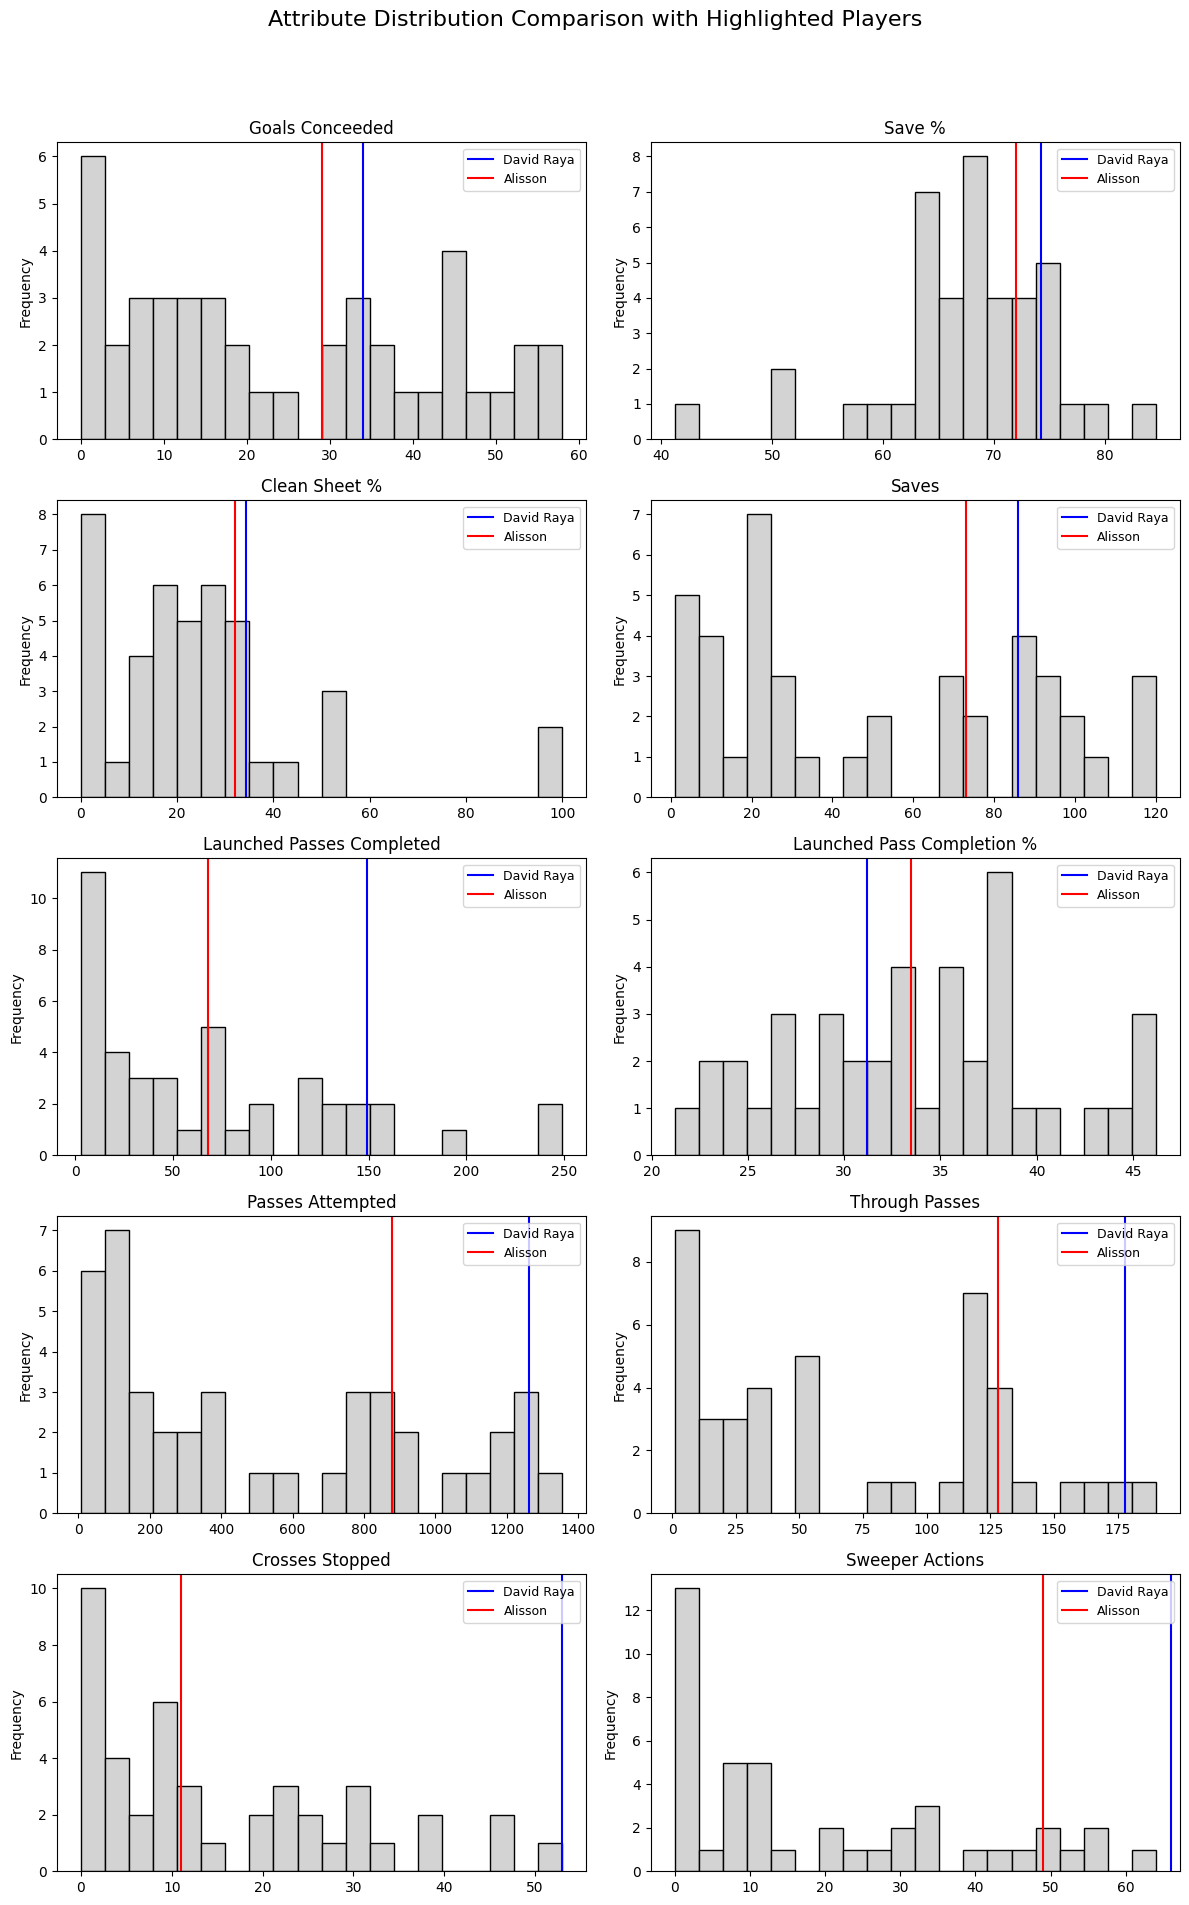

In [52]:
plot_two_players_histograms_matplotlib(goalkeeping_attributes_df, goalkeeping_attributes, 'David Raya', 'Alisson',pos_filter='GK')

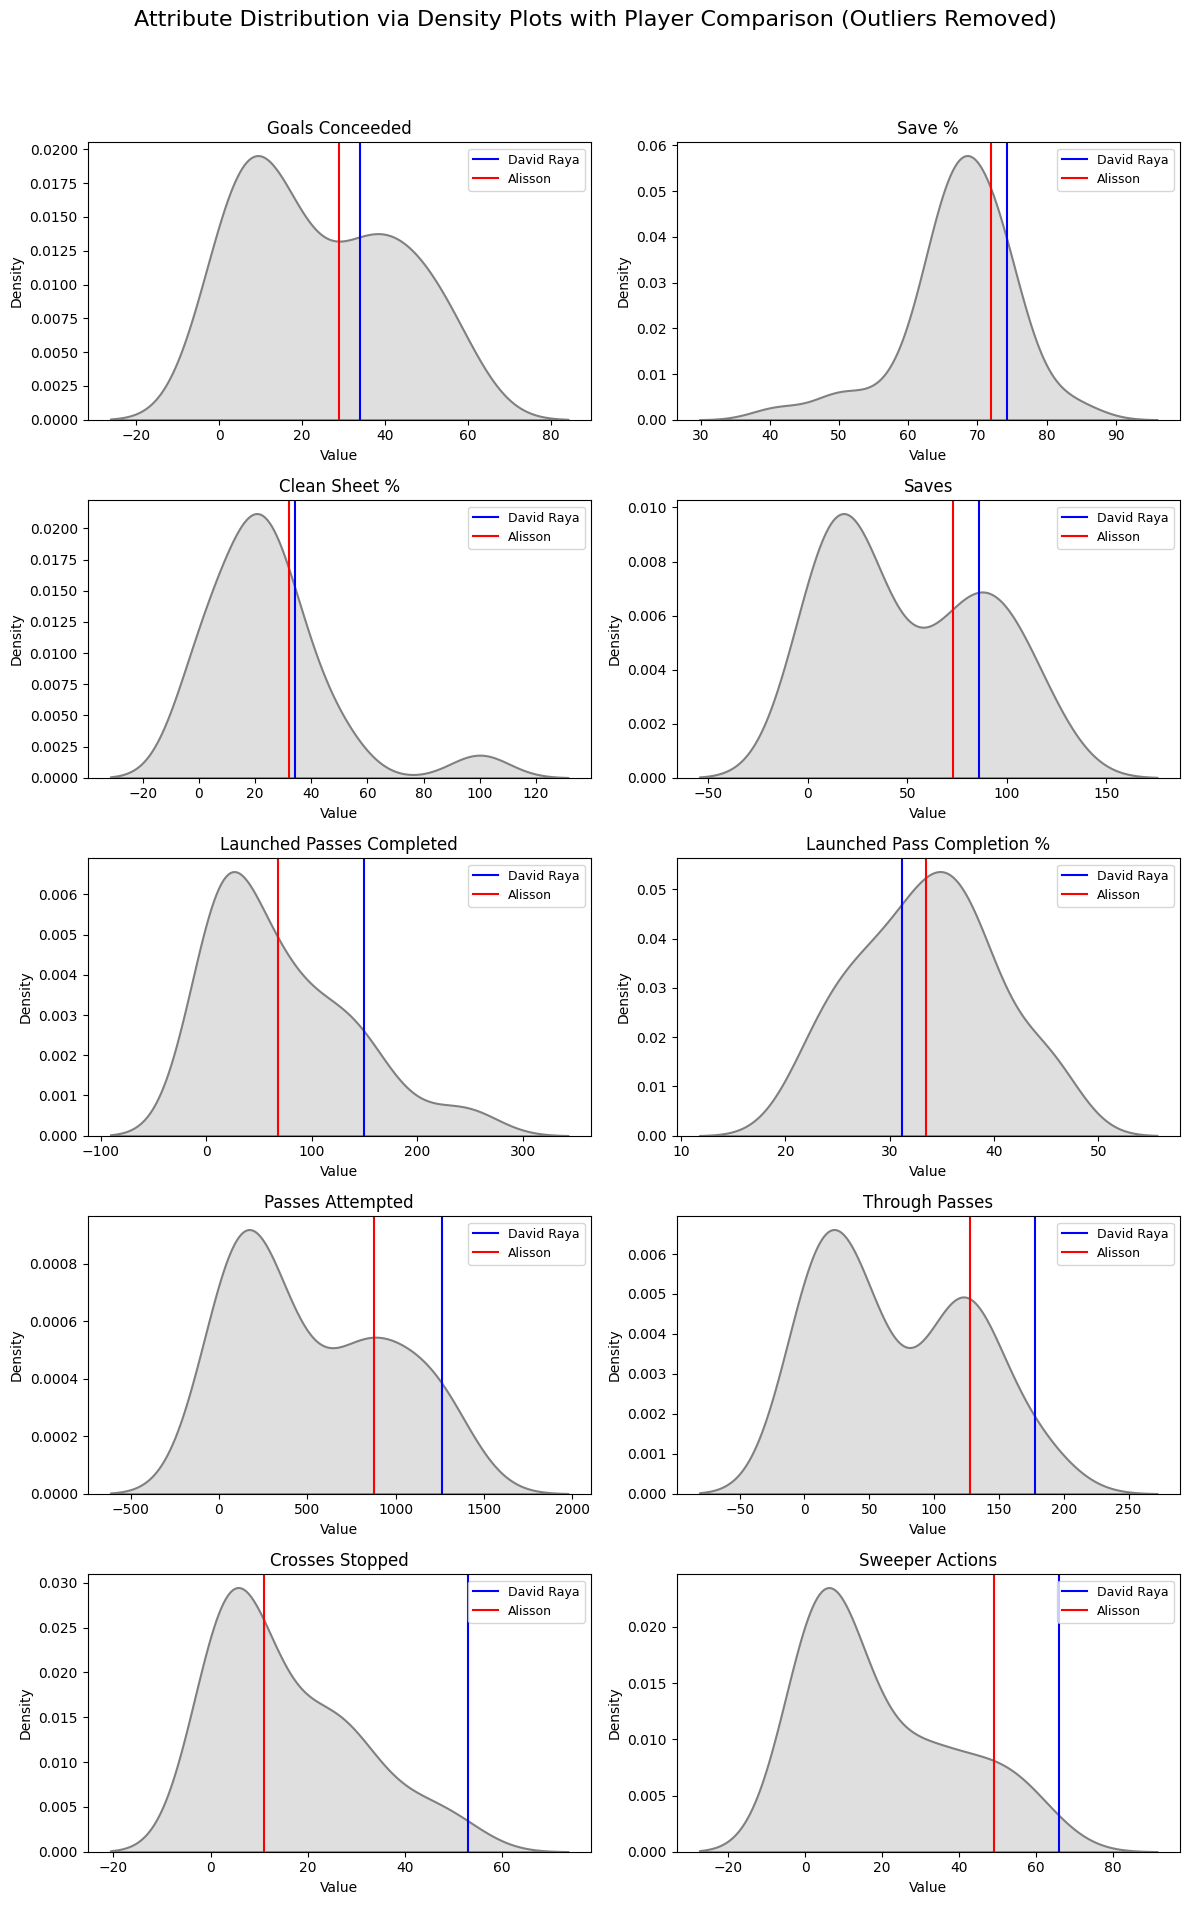

In [53]:
plot_two_players_density_plots_matplotlib(goalkeeping_attributes_df, goalkeeping_attributes, 'David Raya', 'Alisson',pos_filter='GK')